## Algoritma Apriori

#### [Menampilkan Kombinasi dari Contoh Transaksi "Kecil"](https://academy.dqlab.id/main/livecode/11/21/626?pr=0)

In [2]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
#Menggunakan library arules
library(arules)

#Membaca transaksi dari file data_transaksi.txt
transaksi <- read.transactions(file="https://storage.googleapis.com/dqlab-dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)

#Menampilkan jumlah kombinasi dari produk yang terdapat pada daftar transaksi yang ada
inspect(apriori(transaksi, parameter = list(support=.1, minlen=2, target='frequent itemsets')))

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.1      2
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [9 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    items                        support count
[1] {Gula, Pet Food}             0.1     1    
[2] {Gula, Sirup}                0.2     2    
[3] {Gula, Teh Celup}            0.3     3    
[4] {Pet Food, Sirup}            0.4     4    
[

#### [Menampilkan Kombinasi dari Transaksi "Besar"](https://academy.dqlab.id/main/livecode/11/21/627?pr=0)

In [4]:
#Membaca transaksi dari file data_transaksi2.txt
transaksi <- read.transactions(file="https://storage.googleapis.com/dqlab-dataset/data_transaksi2.txt", format="single", sep="\t", cols=c(1,2), skip=1)

#Menampilkan jumlah kombinasi dari produk yang terdapat pada daftar transaksi yang ada
inspect(apriori(transaksi, parameter = list(support=.03, minlen=2, target='frequent itemsets')))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.03      2
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[70 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [56 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [1248 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
       items                               support count
[1]    {Shampo Biasa,                                   
        Tas Makeup}                          0.031    31
[2]    {Tank Top,                                  

Algoritma apriori adalah salah satu algoritma yang merupakan penerapan praktis dari Market Basket Analysis (MBA). Algoritma ini digunakan untuk menganalisa banyaknya kombinasi produk yang terjadi di dalam transaksi ritel, yang akan sulit dan lama jika dilakukan secara manual.

Secara teknis, algoritma apriori akan mencari tingkat asosiasi antar item di dalam banyak kombinasi kelompok data secara otomatis. Kombinasi ini juga bisa disusun dengan suatu aturan (rule) asosiasi "Jika membeli ini produk A maka akan membeli produk B", sehingga algoritma ini dikategorikan sebagai Association Rules di ranah machine learning.

Dengan menemukan paket produk yang asosiasinya kuat, Anda sebagai seorang data scientist dapat menyarankan kepada bisnis dapat melakukan berbagai action item seperti membuat paket produk dengan penawaran khusus, mendekatkan produk-produk tersebut saling berdekatan dalam satu rak, mengeluarkan rekomendasi produk di sistem e-commerce, mengurangi masalah stok, dan lain-lain.

## Item and Transaction

#### [Membaca File sebagai Data Frame](https://academy.dqlab.id/main/livecode/11/24/111?pr=0)

In [5]:
#Membaca file yang berlokasi di https://storage.googleapis.com/dqlab-dataset/data_transaksi.txt dengan fungsi read.csv, dan kemudian disimpan pada variable transaksi_tabular
transaksi_tabular <- read.csv("https://storage.googleapis.com/dqlab-dataset/data_transaksi.txt", sep="\t")

#Menampilkan variable transaksi_tabular dengan fungsi print
print(transaksi_tabular)

   Kode.Transaksi      Item
1             #01 Teh Celup
2             #01     Sirup
3             #01  Pet Food
4             #02 Teh Celup
5             #02      Gula
6             #03     Sirup
7             #03  Pet Food
8             #04 Teh Celup
9             #04     Sirup
10            #05 Teh Celup
11            #05     Sirup
12            #05      Gula
13            #06 Teh Celup
14            #06  Pet Food
15            #07 Teh Celup
16            #07     Sirup
17            #07  Pet Food
18            #08 Teh Celup
19            #09 Teh Celup
20            #09      Gula
21            #10     Sirup
22            #10  Pet Food
23            #10      Gula


#### [Membaca File sebagai Transaction](https://academy.dqlab.id/main/livecode/11/24/115?pr=0)

In [6]:
read.transactions(file="https://storage.googleapis.com/dqlab-dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)

transactions in sparse format with
 10 transactions (rows) and
 4 items (columns)

#### [Menampilkan Daftar Item Transaksi](https://academy.dqlab.id/main/livecode/11/24/116?pr=0)

In [7]:
transaksi <- read.transactions(file="https://storage.googleapis.com/dqlab-dataset/data_transaksi.txt", format="single", sep="\t", cols=c(1,2), skip=1)

transaksi@itemInfo

labels
<chr>
Gula
Pet Food
Sirup
Teh Celup


#### [Menampilkan Daftar Kode Transaksi](https://academy.dqlab.id/main/livecode/11/24/117?pr=0)

In [8]:
transaksi@itemsetInfo

transactionID
<chr>
#01
#02
#03
#04
#05
#06
#07
#08
#09


#### [Tampilan Transaksi dalam bentuk Matrix](https://academy.dqlab.id/main/livecode/11/24/119?pr=0)

In [9]:
transaksi@data

4 x 10 sparse Matrix of class "ngCMatrix"
                        
[1,] . | . . | . . . | |
[2,] | . | . . | | . . |
[3,] | . | | | . | . . |
[4,] | | . | | | | | | .

#### [Item Frequency](https://academy.dqlab.id/main/livecode/11/24/678?pr=0)

In [10]:
itemFrequency(transaksi, type="absolute")

Gula  Pet Food     Sirup Teh Celup 
        4         5         6         8

#### [Statistik Top 3](https://academy.dqlab.id/main/livecode/11/24/679?pr=0)

In [11]:
data_item <- itemFrequency(transaksi, type="absolute")

#Melakukan sorting pada data_item
data_item <- sort(data_item, decreasing = TRUE)

#Mengambil 3 item pertama
data_item <- data_item[1:3]

#Konversi data_item menjadi data frame dengan kolom Nama_Produk dan Jumlah
data_item <- data.frame("Nama Produk"=names(data_item), "Jumlah"=data_item, row.names=NULL)

print(data_item)

  Nama.Produk Jumlah
1   Teh Celup      8
2       Sirup      6
3    Pet Food      5


#### [Output Statistik Top 3 Sebagai File](https://academy.dqlab.id/main/livecode/11/24/680?pr=0)

In [12]:
#Menulis File Statistik Top 3
write.csv(data_item, file="top3_item_retail.txt", eol = "\r\n")

#### [Grafik Item Frequency](https://academy.dqlab.id/main/livecode/11/24/120?pr=0)

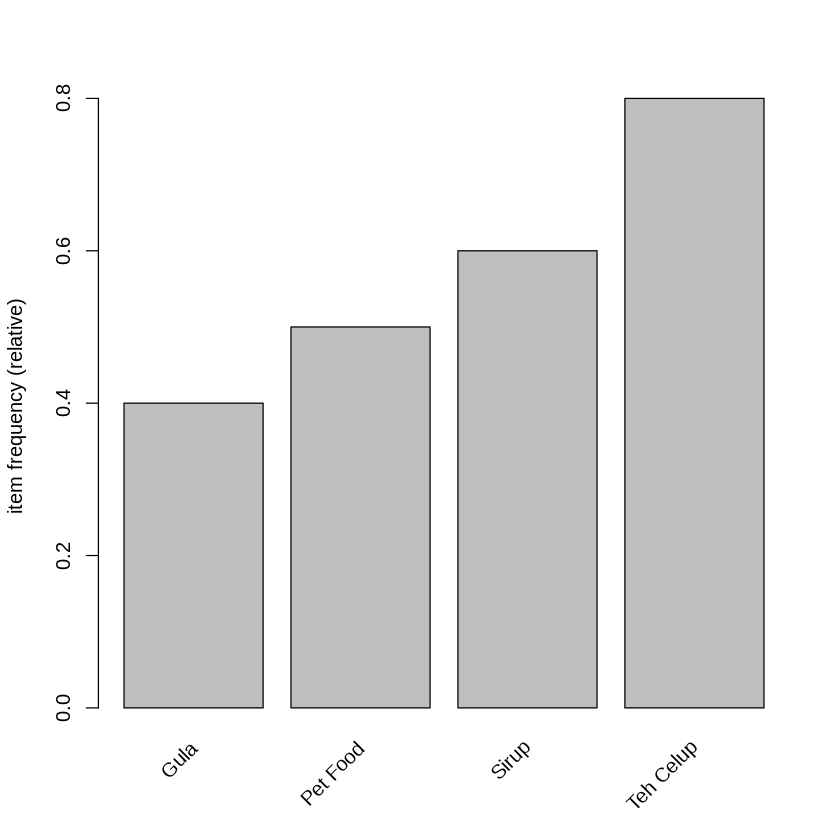

In [13]:
#Tampilan item frequency plot
itemFrequencyPlot(transaksi)

## Itemset and Rules

#### [Melihat Itemset per Transaksi dengan Inspect](https://academy.dqlab.id/main/livecode/11/25/123?pr=0)

In [14]:
#Menggunakan inspect terhadap transaksi
inspect(transaksi)

     items                        transactionID
[1]  {Pet Food, Sirup, Teh Celup} #01          
[2]  {Gula, Teh Celup}            #02          
[3]  {Pet Food, Sirup}            #03          
[4]  {Sirup, Teh Celup}           #04          
[5]  {Gula, Sirup, Teh Celup}     #05          
[6]  {Pet Food, Teh Celup}        #06          
[7]  {Pet Food, Sirup, Teh Celup} #07          
[8]  {Teh Celup}                  #08          
[9]  {Gula, Teh Celup}            #09          
[10] {Gula, Pet Food, Sirup}      #10          


#### [Menghasilkan Rules dengan Apriori](https://academy.dqlab.id/main/livecode/11/25/124?pr=0)

In [15]:
#Menghasilkan associaton rules
apriori(transaksi)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 3 rules 

#### [Melihat Rules dengan fungsi inspect](https://academy.dqlab.id/main/livecode/11/25/125?pr=0)

In [16]:
#Menghasilkan association rules dan disimpan sebagai variable mba
mba <- apriori(transaksi)

#Melihat isi dari rules dengan menggunakan fungsi inspect
inspect(mba)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                 rhs         support confidence coverage lift     count
[1] {}               => {Teh Celup} 0.8     0.8        1.0      1.000000 8    
[2] {Pet Food}       => {Sirup}     0.4     0.8        0.5      1.333333 4    
[3] {Gula, Pet Food} => {Sirup}     0.1     1.0        0.1 

#### [Filter RHS](https://academy.dqlab.id/main/livecode/11/25/126?pr=0)

In [17]:
#Filter rhs dengan item "Sirup" dan tampilkan
inspect(subset(mba, rhs %in% "Sirup"))

    lhs                 rhs     support confidence coverage lift     count
[1] {Pet Food}       => {Sirup} 0.4     0.8        0.5      1.333333 4    
[2] {Gula, Pet Food} => {Sirup} 0.1     1.0        0.1      1.666667 1    


#### [Filter LHS](https://academy.dqlab.id/main/livecode/11/25/127?pr=0)

In [18]:
inspect(subset(mba, lhs %in% "Gula"))

    lhs                 rhs     support confidence coverage lift     count
[1] {Gula, Pet Food} => {Sirup} 0.1     1          0.1      1.666667 1    


#### [Filter LHS dan RHS](https://academy.dqlab.id/main/livecode/11/25/128?pr=0)

In [19]:
inspect(subset(mba, lhs %in% "Pet Food" & rhs %in% "Sirup"))

    lhs                 rhs     support confidence coverage lift     count
[1] {Pet Food}       => {Sirup} 0.4     0.8        0.5      1.333333 4    
[2] {Gula, Pet Food} => {Sirup} 0.1     1.0        0.1      1.666667 1    


## Scoring and Evaluation: Support, Confidence and Lift

#### [Menghasilkan Rules dengan Parameter Support dan Confidence](https://academy.dqlab.id/main/livecode/11/26/133?pr=0)

In [20]:
apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 16 rules 

#### [Inspeksi Rules Yang Dihasilkan](https://academy.dqlab.id/main/livecode/11/26/134?pr=0)

In [21]:
mba <- apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))

inspect(mba)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                      rhs         support confidence coverage lift     
[1]  {}                    => {Pet Food}  0.5     0.5000000  1.0      1.0000000
[2]  {}                    => {Sirup}     0.6     0.6000000  1.0      1.0000000
[3]  {}                    => {Teh Celup} 0.8     0.800

#### [Filter LHS dan RHS (2)](https://academy.dqlab.id/main/livecode/11/26/135?pr=0)

In [22]:
inspect(subset(mba, lhs %in% "Teh Celup" | rhs %in% "Teh Celup"))

    lhs                      rhs         support confidence coverage lift     
[1] {}                    => {Teh Celup} 0.8     0.8000000  1.0      1.0000000
[2] {Gula}                => {Teh Celup} 0.3     0.7500000  0.4      0.9375000
[3] {Pet Food}            => {Teh Celup} 0.3     0.6000000  0.5      0.7500000
[4] {Sirup}               => {Teh Celup} 0.4     0.6666667  0.6      0.8333333
[5] {Teh Celup}           => {Sirup}     0.4     0.5000000  0.8      0.8333333
[6] {Gula, Sirup}         => {Teh Celup} 0.1     0.5000000  0.2      0.6250000
[7] {Pet Food, Sirup}     => {Teh Celup} 0.2     0.5000000  0.4      0.6250000
[8] {Pet Food, Teh Celup} => {Sirup}     0.2     0.6666667  0.3      1.1111111
[9] {Sirup, Teh Celup}    => {Pet Food}  0.2     0.5000000  0.4      1.0000000
    count
[1] 8    
[2] 3    
[3] 3    
[4] 4    
[5] 4    
[6] 1    
[7] 2    
[8] 2    
[9] 2    


#### [Filter berdasarkan Lift](https://academy.dqlab.id/main/livecode/11/26/146?pr=0)

In [23]:
inspect(subset(mba, (lhs %in% "Teh Celup" | rhs %in% "Teh Celup") & lift>1))

    lhs                      rhs     support confidence coverage lift     count
[1] {Pet Food, Teh Celup} => {Sirup} 0.2     0.6666667  0.3      1.111111 2    


#### [Rekomendasi - Filter dengan %ain%](https://academy.dqlab.id/main/livecode/11/26/147?pr=0)

In [24]:
inspect(subset(mba, (lhs %ain% c("Pet Food", "Gula" ))))

    lhs                 rhs     support confidence coverage lift     count
[1] {Gula, Pet Food} => {Sirup} 0.1     1          0.1      1.666667 1    


#### [Visualisasi Rules dengan Graph](https://academy.dqlab.id/main/livecode/11/26/148?pr=0)

In [26]:
install.packages("arulesViz")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘registry’, ‘lmtest’, ‘Rcpp’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




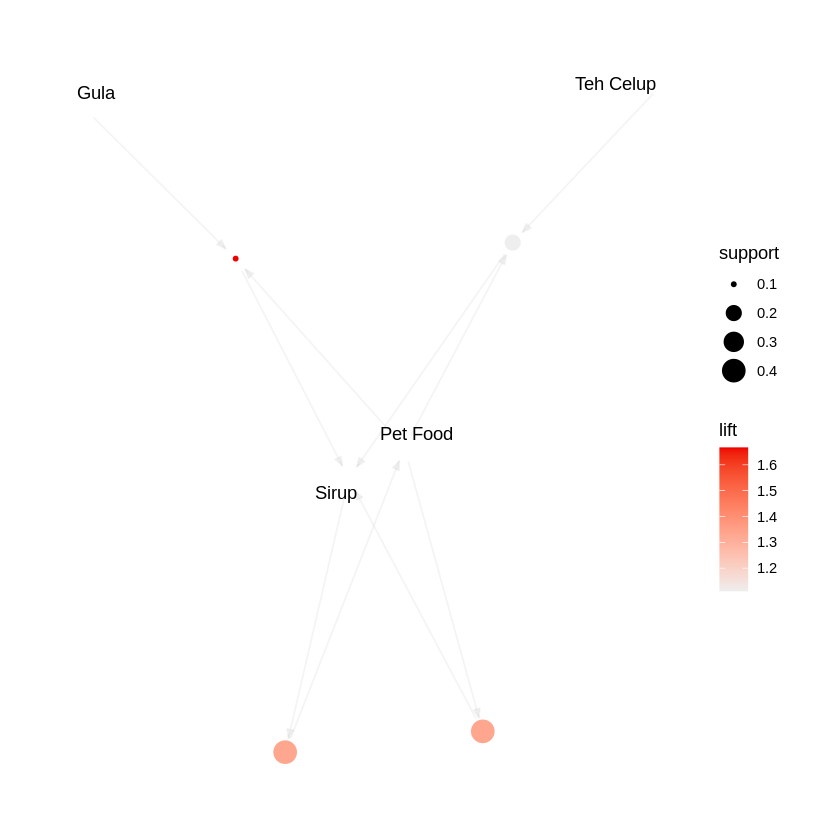

In [27]:
library(arulesViz)

plot(subset(mba, lift>1.1), method="graph")